<a href="https://colab.research.google.com/github/jpd-oliveira/SI-Lab-2/blob/master/SI_Lab2_20_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### ![FCT](https://www.acessolivre.pt/wp-content/uploads/2015/10/Imagem-UNL.jpg "FCT-UNL")

## **SI 20/21 - Predicting the Output for a Multistage Factory Process using Machine Learning**

---

### **Problem Description**

A multistage manufacturing process refers to a system encompassing multiple components, stations or stages required to finish the final product, being very common in modern manufacturing. Typically, the quality of the final product depends on the complex interactions between different stages. Thus, the quality characteristics at one stage are not only influenced by local variations at that stage, but also by variations propagated from upstream stages.

In this context predictive models based on machine learning can be used in the development of real time process controllers, anomaly detection, quality control, etc.

<img width=400px align="right" src="https://p2.piqsels.com/preview/730/1011/600/plant-production-industry-manufactures-thumbnail.jpg" title="Source: [Online] https://p2.piqsels.com/preview/730/1011/600/plant-production-industry-manufactures-thumbnail.jpg">
      
### **Data**

The dataset contains data sampled every minute from one production run of a multistage continuous flow manufacturing process spanning several hours. The focus is put on three machines operating in parallel at the first stage, which then feed their outputs into a step that combines the flows. 

The output from the combiner step is measured in 6 different locations. The **goal** is to predict the measurements of the output from this stage, based on the data from the shopfloor environment and operations upstream. 

### **Required Material**

The assignment will be developed using **Google Colaboratory** to ensure that everyone has access to the same computational resources, without requiring additional configuration effort.

https://colab.research.google.com/

Google Colab provides a platform that allows you to write and execute Python notebooks
in the browser, with minimal configuration required and free access to GPUs.

The .ipynb provided by the the teaching staff should be uploaded to the student's Google Drive (using the University's student account) and opened directly in Colab.

**Recommended Packages:** *Pandas* and *Numpy* (data structures and manipulation), *Scikit-Learn* (Machine Learning), *Matplotlib* and *Seaborn* (visualization).

### **Submission Guidelines and Deadline**
* Completed projects should be submitted via the course's **Moodle** page before the end of the deadline.
* Projects should be executed in groups of 2 or 3 (maximum) students. 
* The project should be submitted as a **single .ipynb** notebook file, named following the template **"*studentNumber1_studentNumber2_studentNumber3.rar*"** (e.g. *31444_31445_31446.rar*) containing:
   * The complete jupyter notebook contemplating the data analysis / machine learning part of the assignment. You can use the template provided in the CLIP platform which simultaneous serves as a guideline, project template and report.
* Deadline is **19 of December, 23:59 GMT**.

### **Evaluation Criteria**

All of the goal/value pairs listed below are based on the assumption that a correct implementation is submitted. 

Feel free to fill in the *Completed* column in accordance to your submission for the discussion (replace "*-*" with "*X*" when suitable).

| Goal                                                     | Value | Completed |
|:--------------------------------------------------------|:------|:----------:| 
| üíæ Loading and preparing train/test data                | 4     |     X      |
| üèãÔ∏è Training **at least 3** different regressors         | 6     |     X      |
| üíØ Evaluating each regressor using adequate metrics     | 4     |     X      |
| üìà Plotting the results for comparison                  | 3     |     -      |
| üí¨ Discussing the results                               | 1     |     -      |
| ‚ùì  Additional features (Free choice)                           | 2     |    -       |

Please refer to the lab staff for additional info regarding possible additional features. Examples include for instance performing feature extraction on the original dataset to check if newly created features improve performance or tuning the models' hyper-parameters (please refer to the [documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) which includes several examples) to optimize performance.

### **Lab Planning**

* Lab 1 (week of 30/11/20) - Intro, Data Ingestion and Exploration
* Lab 2 (week of 07/12/20) - Model Training and Evaluation
* Lab 3 (week of 14/12/20) - Visualization and Bonus Features


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **TO DO**: 
1) Load the training data 
* Use read_csv (pandas) to load data into a dataframe 
* Use the dataframe's head() to check the first few rows 


In [3]:
#TBD
import pandas as pd
df = pd.read_csv('/content/si_lab2_dataset.csv')
df.head()

time_stamp  ...  Stage1.Output.Measurement6.U.Actual
0  06/03/2019 10:52:00  ...                                 2.69
1  06/03/2019 10:52:01  ...                                 2.70
2  06/03/2019 10:52:02  ...                                 2.70
3  06/03/2019 10:52:03  ...                                 2.70
4  06/03/2019 10:52:04  ...                                 2.72

[5 rows x 48 columns]

### **TO DO**: 
2) Check the shape and sum of missing values per feature using the .shape and .isna().sum() functions from Pandas' Dataframe.

In [4]:
# dataframe.shape 
shape = df.shape
missing = df.isna().sum()
shape
missing

time_stamp                                            0
AmbientConditions.AmbientHumidity.U.Actual            0
AmbientConditions.AmbientTemperature.U.Actual         1
Machine1.RawMaterial.Property1                        1
Machine1.RawMaterial.Property2                        0
Machine1.RawMaterial.Property3                        0
Machine1.RawMaterial.Property4                        0
Machine1.RawMaterialFeederParameter.U.Actual          1
Machine1.Zone1Temperature.C.Actual                    1
Machine1.Zone2Temperature.C.Actual                    0
Machine1.MotorAmperage.U.Actual                       1
Machine1.MotorRPM.C.Actual                            0
Machine1.MaterialPressure.U.Actual                    1
Machine1.MaterialTemperature.U.Actual                 0
Machine1.ExitZoneTemperature.C.Actual                 0
Machine2.RawMaterial.Property1                        0
Machine2.RawMaterial.Property2                        0
Machine2.RawMaterial.Property3                  

### **TO DO**: 
3) Drop rows containing missing values using .dropna . Verify if rows were correctly dropped by printing the dataframe's shape.

In [5]:
#TBD
df = df.dropna()
missing = df.isna().sum()
missing

time_stamp                                            0
AmbientConditions.AmbientHumidity.U.Actual            0
AmbientConditions.AmbientTemperature.U.Actual         0
Machine1.RawMaterial.Property1                        0
Machine1.RawMaterial.Property2                        0
Machine1.RawMaterial.Property3                        0
Machine1.RawMaterial.Property4                        0
Machine1.RawMaterialFeederParameter.U.Actual          0
Machine1.Zone1Temperature.C.Actual                    0
Machine1.Zone2Temperature.C.Actual                    0
Machine1.MotorAmperage.U.Actual                       0
Machine1.MotorRPM.C.Actual                            0
Machine1.MaterialPressure.U.Actual                    0
Machine1.MaterialTemperature.U.Actual                 0
Machine1.ExitZoneTemperature.C.Actual                 0
Machine2.RawMaterial.Property1                        0
Machine2.RawMaterial.Property2                        0
Machine2.RawMaterial.Property3                  

### **TO DO**: 
4) Generate descriptive statistics. These include those that summarize the central tendency, dispersion and shape of a dataset‚Äôs distribution, excluding NaN values.

In [6]:
#TBD
df.describe()


AmbientConditions.AmbientHumidity.U.Actual  ...  Stage1.Output.Measurement6.U.Actual
count                                14071.000000  ...                         14071.000000
mean                                    15.331392  ...                             2.880966
std                                      1.188786  ...                             0.941176
min                                     13.840000  ...                            -1.225095
25%                                     14.040000  ...                             3.020000
50%                                     15.120000  ...                             3.180000
75%                                     16.630000  ...                             3.320000
max                                     17.240000  ...                             6.910000

[8 rows x 47 columns]

### **TO DO**: 
5) Plot the correlation matrix for the dataset.

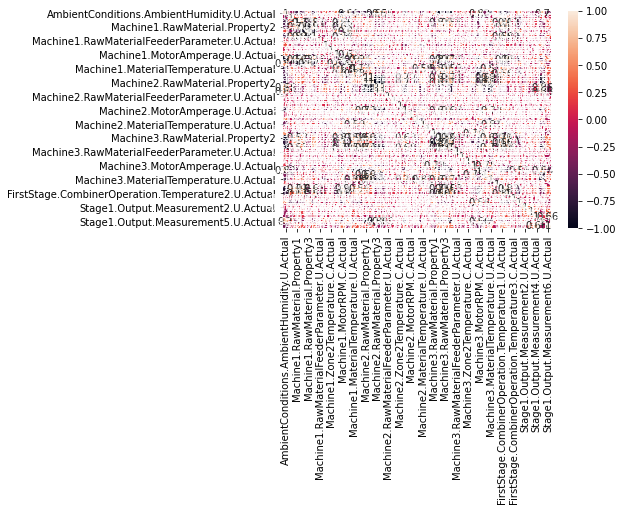

In [7]:
#TBD
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

### **TO DO**: 
6) Build a dictionary with key/value pairs for each metric and calculate its value using the corresponding sklearn.metrics call. Build a pandas dataframe from the dict using pd.DataFrame.from_dict

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
import math


def evaluate_regressor(name, y_test, y_pred):  
    """Calculate the main regression metrics supporting multi-target cases for a given model.  

    Args:
        name (str): The trained model's name
        y_test (series): Contains the ground truth values (aka y_true)
        y_pred (series): Contains the predicted values for the test set
        
    Returns:
        df_metrics (DataFrame): The predicted metrics in a DataFrame
        
    """
    dict_metrics = {
        'Explained Variance': explained_variance_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2': r2_score(y_test,y_pred)
    }
    
    df_metrics = pd.DataFrame.from_dict(dict_metrics, orient='index')
    df_metrics.columns = [name]
    return df_metrics

### **TO DO**: 
7) Train/Test Split:
* Split the dataset into X (inputs) and Y (outputs) (suggestion: use .iloc)

* Then use train_test_split from scikit-learn to further split them into X_train, X_test, y_train, and y_test with and appropriate test size (e.g. 20% or 33%)

* Ensure the data is shuffled, since we are not interested in the sequence, but instead want to see if there's any relation between the machine/process parameters in the multistage process upstream and the output

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np


X = df.iloc[:,:-6]
Y = df.iloc[:,-6:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33) #shuffle=true by default



### **TO DO**: 
8) Store the time_stamp for later in case we want to do some visualizations, and remove it from training/test set with .drop.

As previously stated, we are not interested in the temporal dimension of the dataset.

In [10]:
#TBD
X_train = X_train.drop(X_train.columns[0], axis=1)
X_test = X_test.drop(X_test.columns[0], axis=1)
X_train

AmbientConditions.AmbientHumidity.U.Actual  ...  FirstStage.CombinerOperation.Temperature3.C.Actual
5262                                        16.25  ...                                               80.0 
11728                                       13.94  ...                                               80.0 
840                                         16.95  ...                                               80.0 
13525                                       14.13  ...                                               79.7 
13671                                       13.94  ...                                               80.2 
...                                           ...  ...                                                ... 
4024                                        16.64  ...                                               80.0 
755                                         16.95  ...                                               80.2 
6946                                        15.22  ...                                               80.2 
4780                                        16.63  ...                                               80.2 
7039                                        15.12  ...                                               80.2 

[9427 rows x 41 columns]

### **TO DO**: 

9) Train at least 3 different regression models. Experiment with the model parameters (see the scikit-learn documentation) to aim for the best performance you can achieve.

In [134]:
# Imports
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Instantiate regressor
regressor = DecisionTreeRegressor(random_state = 0) 

# Fit the regressor to the training data
regressor.fit(X_train, y_train) 

# Generate predictions from test set
y_pred = regressor.predict(X_test)

# Evaluate using evaluate_regressor
df_rfr_metrics = evaluate_regressor("DecisionTreeRegressor", y_test, y_pred)
df_rfr_metrics

DecisionTreeRegressor
Explained Variance               0.656681
MAE                              0.259670
MSE                              3.782051
RMSE                             1.944749
R2                               0.656579

In [129]:
# Imports
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Instantiate regressor
regressor = LinearRegression()

# Fit the regressor to the training data
regressor.fit(X_train, y_train) 

# Generate predictions from test set
y_pred = regressor.predict(X_test)

# Evaluate using evaluate_regressor
df_rfr_metrics = evaluate_regressor("LinearRegression", y_test, y_pred)
df_rfr_metrics

LinearRegression
Explained Variance          0.481768
MAE                         0.961011
MSE                         5.642091
RMSE                        2.375309
R2                          0.481671

In [131]:
# Imports
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Instantiate regressor
regressor = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0) 

# Fit the regressor to the training data
regressor.fit(X_train, y_train) 

# Generate predictions from test set
y_pred = regressor.predict(X_test)

# Evaluate using evaluate_regressor
df_rfr_metrics = evaluate_regressor("RandomForestRegressor", y_test, y_pred)
df_rfr_metrics

RandomForestRegressor
Explained Variance               0.795797
MAE                              0.285985
MSE                              2.269678
RMSE                             1.506545
R2                               0.795689

### **TO DO**: 
10) Implement a function that prints the RMSE and R2 values per target for a given model. Then call it for each of your models to get an overview of the results.

In [127]:
def print_rmse_per_target(model_name, y_test, y_pred):
  for i in range(6):
    #print(y_test.iloc[:,i], y_pred[:,i])
    rmse = mean_squared_error(y_test.iloc[:,i], y_pred[:,i], squared=False)
    r2= r2_score(y_test.iloc[:,i], y_pred[:,i])
    print(model_name, "RMSE: ", rmse, "R2: ", r2)



In [128]:
print_rmse_per_target("DecisionTreeRegressor", y_test, y_pred)

DecisionTreeRegressor RMSE:  2.649811479999195 R2:  0.8512632475386355
DecisionTreeRegressor RMSE:  0.8623373387142109 R2:  0.3101499959864704
DecisionTreeRegressor RMSE:  3.548271637141376 R2:  0.14700172754755714
DecisionTreeRegressor RMSE:  1.2709263157840736 R2:  0.9036091021538823
DecisionTreeRegressor RMSE:  0.7523564547450589 R2:  0.9118508360612765
DecisionTreeRegressor RMSE:  0.3945262755155701 R2:  0.8156000329436118


In [130]:
print_rmse_per_target("LinearRegression", y_test, y_pred)

LinearRegression RMSE:  3.1330954261246253 R2:  0.7920611750817129
LinearRegression RMSE:  0.9519528161263988 R2:  0.15931918873918938
LinearRegression RMSE:  3.6482363088371907 R2:  0.0982620349920108
LinearRegression RMSE:  2.9528931829705756 R2:  0.47965575522790327
LinearRegression RMSE:  0.803850381289007 R2:  0.8993714211900882
LinearRegression RMSE:  0.6742889911777025 R2:  0.46135688583737156


In [133]:
print_rmse_per_target("RandomForestRegressor", y_test, y_pred)

RandomForestRegressor RMSE:  1.8761021191127942 R2:  0.9254407916362168
RandomForestRegressor RMSE:  0.6384526519412171 R2:  0.6218555948085288
RandomForestRegressor RMSE:  2.871551452124131 R2:  0.4413399231706333
RandomForestRegressor RMSE:  1.0089860481707271 R2:  0.9392472973044768
RandomForestRegressor RMSE:  0.5848114613916419 R2:  0.9467398180213831
RandomForestRegressor RMSE:  0.2912441781848415 R2:  0.8995098534554534


### **TO DO**: 
11) Plot the True Values VS Predictions for each of the output measurements for your best model.

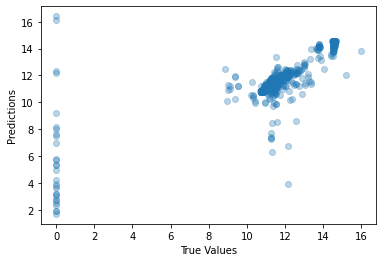

In [24]:
plt.scatter(y_test.iloc[:,1], y_pred[:,1], alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

##Extras

In [136]:
#cross validation
from sklearn.model_selection import KFold # import KFold

x2=X.drop(X.columns[0], axis=1)
y2=Y.drop(Y.columns[0], axis=1)
df2=df.drop(df.columns[0], axis=1)

kf = KFold(n_splits = 50, shuffle = True, random_state = 2)
result = next(kf.split(df2), None)
print(result) 


(array([    0,     1,     2, ..., 14068, 14069, 14070]), array([   20,    50,    70,   166,   234,   351,   355,   418,   441,
         739,   749,   855,   884,  1047,  1048,  1161,  1172,  1219,
        1279,  1283,  1289,  1293,  1317,  1400,  1425,  1434,  1453,
        1492,  1576,  1585,  1630,  1656,  1749,  1763,  1924,  1988,
        2036,  2079,  2147,  2192,  2207,  2215,  2241,  2313,  2325,
        2370,  2373,  2398,  2490,  2618,  2670,  2741,  2786,  2917,
        2959,  2989,  2999,  3025,  3035,  3054,  3194,  3199,  3202,
        3253,  3320,  3392,  3400,  3423,  3431,  3436,  3504,  3514,
        3599,  3616,  3692,  3701,  3711,  3749,  3822,  3866,  3976,
        3985,  4056,  4090,  4125,  4129,  4138,  4142,  4213,  4271,
        4272,  4277,  4368,  4404,  4455,  4514,  4536,  4540,  4646,
        4662,  4668,  4703,  4706,  4745,  4767,  4811,  4814,  4821,
        4923,  4952,  5012,  5084,  5121,  5374,  5385,  5392,  5503,
        5571,  5592,  5605,  5612

In [137]:
train = df2.iloc[result[0]]
test =  df2.iloc[result[1]]

print(train)

       AmbientConditions.AmbientHumidity.U.Actual  ...  Stage1.Output.Measurement6.U.Actual
0                                           17.24  ...                                 2.69
1                                           17.24  ...                                 2.70
2                                           17.24  ...                                 2.70
3                                           17.24  ...                                 2.70
4                                           17.24  ...                                 2.72
...                                           ...  ...                                  ...
14083                                       13.84  ...                                 3.41
14084                                       13.84  ...                                 3.41
14085                                       13.84  ...                                 3.41
14086                                       13.84  ...                          

In [138]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


scores = cross_val_score(regressor, df2, y2, cv=50)
print ("Cross-validated scores:", scores)

Cross-validated scores: [ 0.90733285  0.94459142  0.99210088  0.92510445  0.97483112  0.86266773
  0.91106895  0.52930422  0.81274514  0.97990817  0.75832464  0.7724973
  0.99988978  0.96848385  0.99542581  0.99945053  0.88633931  0.87633539
  0.86883826  0.93491451  0.99287258  0.99081907  0.91107963  0.98915421
  0.98828384  0.88235208  0.92398822  0.81014354  0.99960837  0.91958614
  0.56291045  0.77656408  0.90692609  0.10376867  0.97761382  0.52217094
  0.83748638  0.71595929  0.8724236   0.81714287  0.65713469  0.9886683
  0.99593814  0.99571545  0.99966328  0.99862192  0.99209789  0.99803614
  0.99965252 -0.09862897]


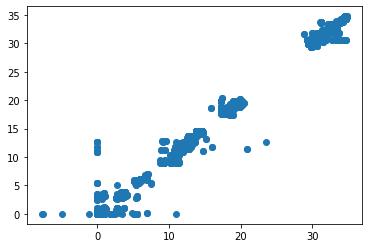

In [139]:
predictions = cross_val_predict(regressor, df2, y2, cv=50)
plt.scatter(y2, predictions)